# Coursera - Machine Learning by Andrew Ng

### Exercise 1 - Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
# ==================== Part 1: Basic Function ====================

def warmUpExercise():
    id = np.identity(5)
    print(id)

print('Running warmUpExercise ... \n')
print('5x5 Identity Matrix: \n')
warmUpExercise()

Running warmUpExercise ... 

5x5 Identity Matrix: 

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


Plotting Data ...


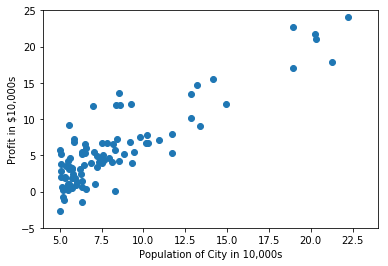

In [3]:
# ======================= Part 2: Plotting =======================
print('Plotting Data ...')

data = pd.read_csv("ex1data1.txt")
data = data.values

X = data[:,0]
y = data[:,1]

y = y.reshape(y.shape[0],1)
X = X.reshape(X.shape[0],1)

m = len(y); # number of training examples

def plotData(x, y):
    
    plt.scatter(x, y)
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')
    
    plt.xlim(4, 24)
    plt.ylim((-5, 25))

plotData(X, y)

In [4]:
# =================== Part 3: Gradient descent ===================

# Add a column of ones to x
X = np.concatenate((np.ones((m,1)), X), axis = 1)

theta = np.zeros((2,1)) # initialize fitting parameters

# Some gradient descent settings
iterations = 1500
alpha = 0.01

In [5]:
# compute and display initial cost
def computeCost(X, y, theta):
    
    m = len(y) # number of training examples
    J = 0
    
    J = (1 / (2*m) ) * np.sum(np.power(((theta.T)-y), 2))
    return J
    
initial_cost = computeCost(X, y, theta)
print("Initial cost = " + str(initial_cost))

Initial cost = 61.5899157107


In [6]:
# run gradient descent

def gradientDescent(X, y, theta, alpha, num_iters):
    
    # Initialize some useful values
    m = len(y); # number of training examples
    J_history = np.zeros((num_iters, 1))
    
    for iter in range(iterations):
        h = np.dot(X,theta) - y
        h_X = np.dot(X.T,h)
        
        temp = theta
        
        temp -= alpha / m * h_X
        
        theta = temp
        
        J_history[iter] = computeCost(X,y,theta)
    
    return theta, J_history


(theta, J_history) = gradientDescent(X, y, theta, alpha, iterations);

print("Theta found by gradient descent:")
print(str(theta))

Theta found by gradient descent:
[[-3.92643901]
 [ 1.1849957 ]]


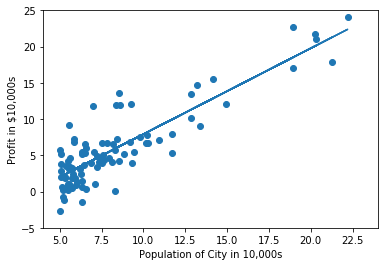

In [7]:
# Plot the linear fit and the data
plot_x = X[:,1]
plot_x = plot_x.reshape(plot_x.shape[0],1)
plot_y = np.dot(X, theta)
plt.plot(plot_x, plot_y)

plotData(X[:,1], y)

plt.show()

In [8]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot(np.array([1, 3.5]), theta)
print('For population = 35,000, we predict a profit of ' + str(predict1*10000))
predict2 = np.dot(np.array([1, 7]), theta)
print('For population = 70,000, we predict a profit of ' + str(predict2*10000))

For population = 35,000, we predict a profit of [ 2210.45952769]
For population = 70,000, we predict a profit of [ 43685.30910995]


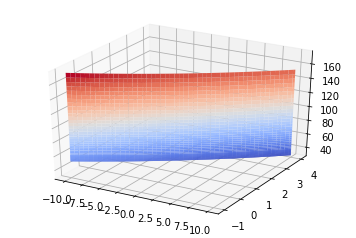

In [9]:
# ============= Part 4: Visualizing J(theta_0, theta_1) =============
# Visualizing J(theta_0, theta_1)

# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, num = 100)
theta1_vals = np.linspace(-1, 4, num = 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals
for i in range(0, len(theta0_vals)):
    for j in range(0, len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i,j] = computeCost(X, y, t)



# Plot the cost as a function of theta0 and theta1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap=cm.coolwarm)

plt.show()